# Easy KLIMT classification
This notebook presents the simplest usage of KLIMT for classification. <br>
The nearest-target classifier is used to classify samples after transformation. <br>
The targets are taken as the class barycenters.

In [70]:
from klimt_classifier import KLIMT_CLF
from utils import print_pred_results
#
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import style
#
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler

In [71]:
plt.style.use('seaborn')

In [72]:
X_1, y_1 = make_moons(n_samples=4000, noise=0.3, random_state=40)
X_2, y_2 = make_moons(n_samples=4000, noise=0.1, random_state=40)
#
y_2 += 2
X_2[:,:] -= 1
#
X = np.concatenate([X_1, X_2])
y = np.concatenate([y_1, y_2])

In [73]:
# For binary clf
# X, y = make_moons(n_samples=4000, noise=0.15, random_state=40)

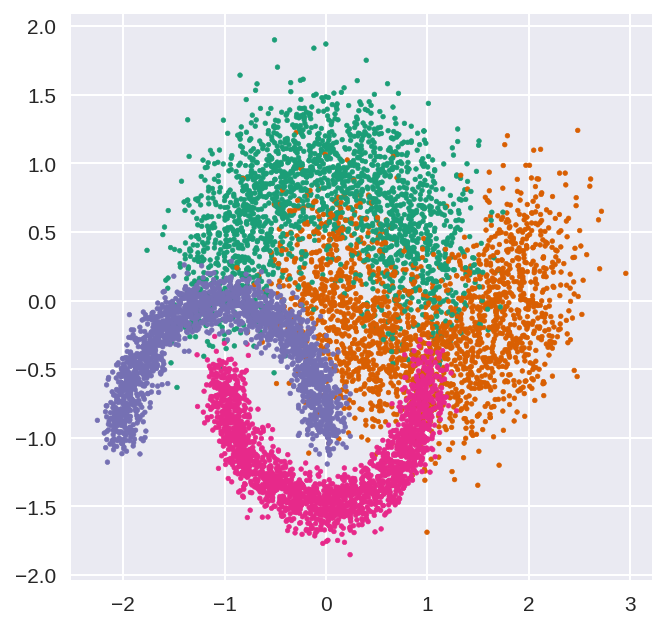

In [74]:
plt.figure(dpi=150, figsize=(5,5))
plt.scatter(X[:,0], X[:,1], s=5, c=cm.Dark2(y))

### Scale (such that $d_{max} = 1$) and split data-set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42, shuffle=True)
# Scaler:
scaler = MinMaxScaler(feature_range=(0, 1/np.sqrt(X_train.shape[1])))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
klimt_clf = KLIMT_CLF(gamma=1000,      # Main parameter
                   k_nn=200,           # param to use only k-nn
                   class_weight=None,  # allow to counter-balanced class inbalanced
                   raise_warning=True, # to show/hide warnings
                   verbose=1,          # to show/hide infos
                   ).fit(X_train, y_train)

[KLIMT CLF] Instantiate KLIMT Transformer
Using class barycenter as targets


In [8]:
pred = klimt_clf.predict(X_test)

[KLIMT] Using gamma = 1000
[KLIMT] Searching for neighbors with sklearn ...


In [9]:
print_pred_results(y_test, pred)

Accuracy : 89.85
Balanced Accuracy : 89.88
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       990
           1       0.88      0.79      0.83      1014
           2       0.90      0.99      0.94       992
           3       0.94      0.97      0.95      1004

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



### Plot the classification result for a regular grid to visualize the classification frontier

In [10]:
n = 300
x = np.linspace(-0.05,0.75, n)
xx,yy = np.meshgrid(x, x)
coord = np.rollaxis(np.array((xx, yy)).reshape(2,n*n), axis=1)
pred_coord = klimt_clf.predict(coord, gamma=1000).reshape(xx.shape)

[KLIMT] Using gamma = 1000
[KLIMT] Searching for neighbors with sklearn ...


[]

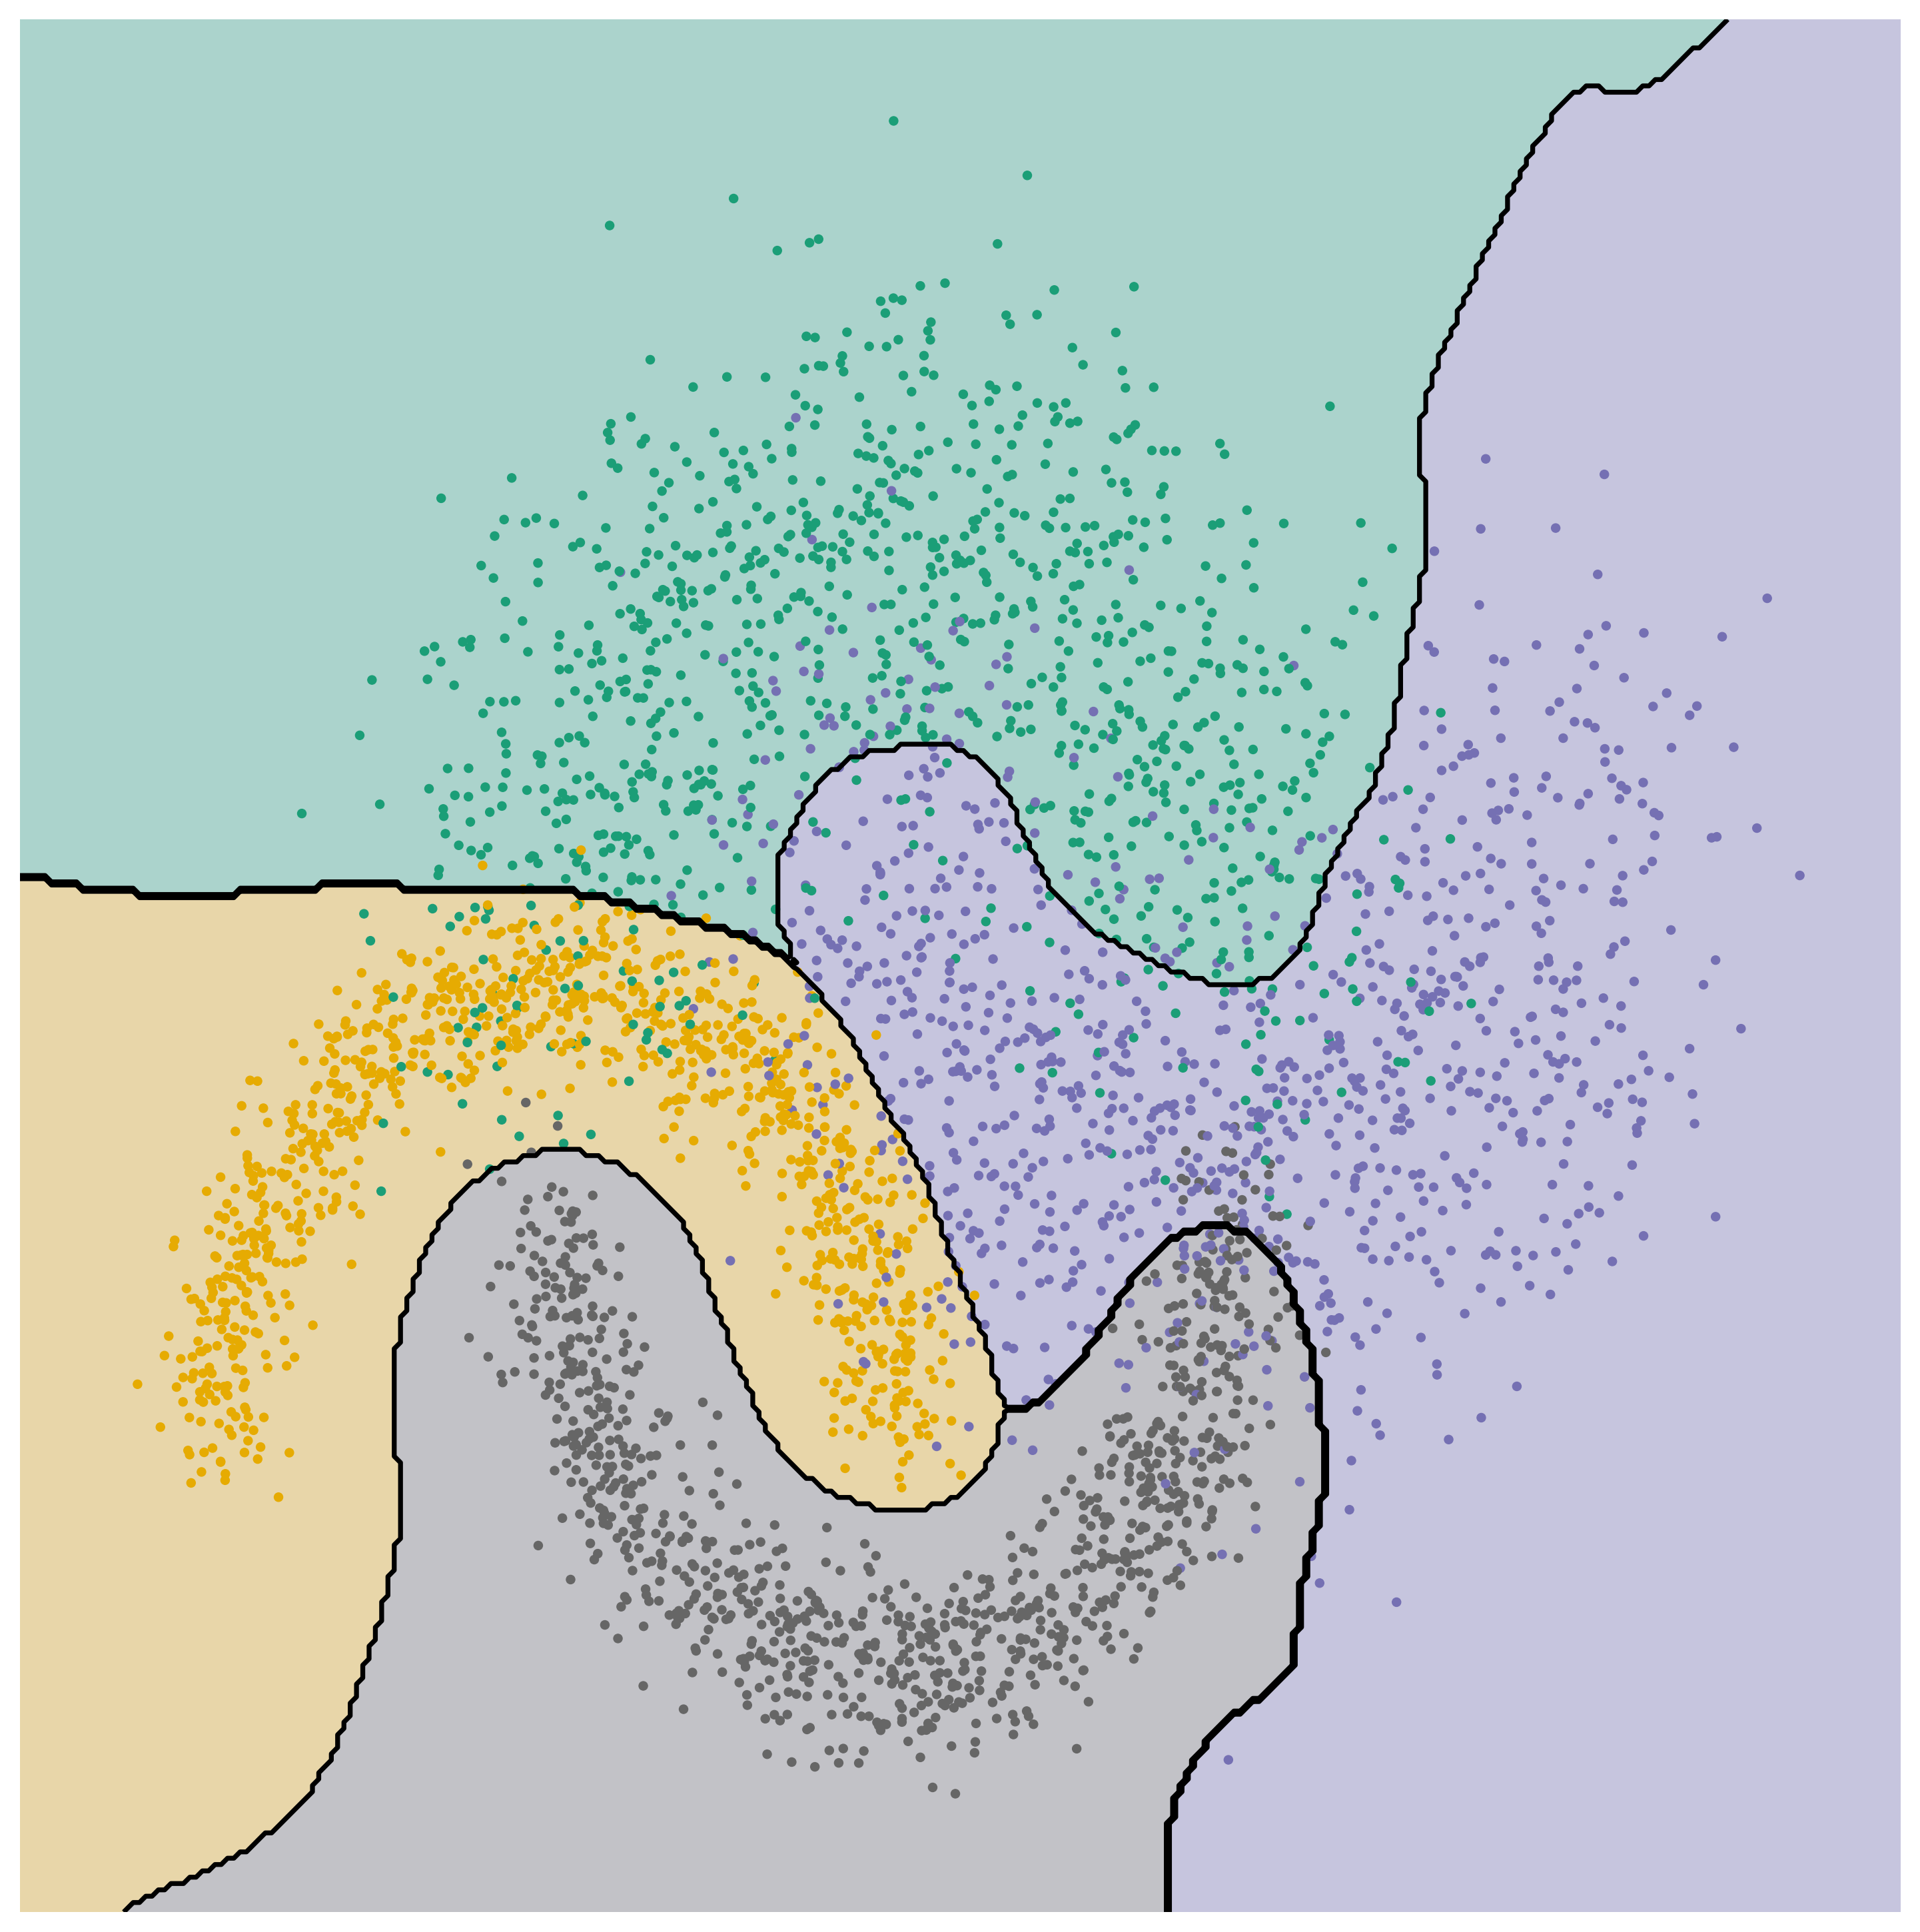

In [11]:
plt.figure(dpi=300, figsize=(10,10))
ax = plt.subplot(111)
ax.contourf(xx, yy, pred_coord, levels=4, cmap='Dark2', alpha=0.3, origin='lower')
ax.contour(xx, yy, pred_coord, levels=[0.5, 1.5, 2.5], origin='lower', colors='k')
ax.scatter(X_train[:,0], X_train[:,1],c=y_train, cmap='Dark2', s=10)
plt.tight_layout()
ax.set_xticks([])
ax.set_yticks([])